In [1]:
#pandas to clean data
#jupyter notebook describing data exploration and cleanup process
#6-8 visualizations of data
##PNG images
#Optional API

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [2]:
#from census 2017
##data already merged
zip_incomes = pd.read_csv("data/combineddata.csv")
zip_incomes.head()

,Unnamed: 0,Store Number,Store Type,Address,City,State,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate
0,0,4,Walmart Supercenter,2901 Highway 412 E,Siloam Springs,AR,72761,22314,31.5,48064,21146,3887,17.419557
1,1,8,Walmart Supercenter,1621 North Business 9,Morrilton,AR,72110,10913,40.0,37808,22314,2302,21.094108
2,2,5,Walmart Supercenter,1155 Hwy 65 North,Conway,AR,72032,32508,34.1,44686,22699,5311,16.337517
3,3,7,Walmart Supercenter,9053 Highway 107,Sherwood,AR,72120,33161,38.7,63575,30459,3654,11.018968
4,4,3,Walmart Supercenter,30983 Highway 441 S,Commerce,GA,30529,10766,36.8,44854,21262,1840,17.090842


In [3]:
zip_incomes.count()

#low = less than 34,999
#middle = 35,000 to 99,999
#high = above 100,000

Unnamed: 0           4965
Store Number         4965
Store Type           4965
Address              4965
City                 4964
State                4965
Zipcode              4965
Population           4965
Median Age           4965
Household Income     4965
Per Capita Income    4965
Poverty Count        4965
Poverty Rate         4965
dtype: int64

In [4]:
zip_incomes.describe()

,Unnamed: 0,Store Number,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate
count,4965.000000,4965.000000,4965.000000,4965.000000,4965.000000,4965.000000,4965.000000,4965.000000,4965.000000
mean,2486.929909,3197.376234,53037.678751,30902.714199,38.206143,57329.762135,28696.978046,4422.222356,14.428271
std,1437.635285,2199.533527,26033.015761,17559.773835,5.699074,19878.779679,8859.517560,3685.220035,7.494674
min,0.000000,1.000000,617.000000,595.000000,20.400000,14500.000000,8762.000000,20.000000,1.326715
25%,1242.000000,1370.000000,31757.000000,17170.000000,34.700000,43361.000000,22655.000000,1914.000000,8.700927
50%,2486.000000,2794.000000,50401.000000,28345.000000,38.000000,52566.000000,27067.000000,3396.000000,13.429752
75%,3733.000000,4946.000000,76036.000000,40937.000000,41.500000,67023.000000,33111.000000,5782.000000,18.776871
max,4976.000000,9283.000000,99901.000000,119204.000000,69.700000,177853.000000,85419.000000,34978.000000,59.579862


In [5]:
lowIncome = zip_incomes.loc[zip_incomes['Household Income'] < 34999]
midIncome = zip_incomes.loc[(zip_incomes['Household Income'] > 35000) & (zip_incomes['Household Income'] < 99999)]
highIncome = zip_incomes.loc[zip_incomes['Household Income'] > 100000]

In [6]:
#low income count
low_income = lowIncome['Zipcode'].count()
#middle income count
mid_income = midIncome['Zipcode'].count()
#high income count
high_income = highIncome['Zipcode'].count()

Text(0.5,1,'Total Walmart Locations In Each Household Income')

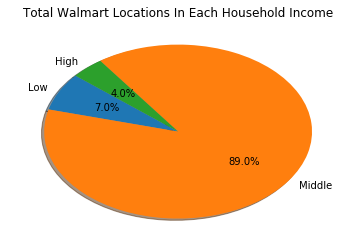

In [7]:
#BREAKDOWN OF LOCATION COUNT IN EACH INCOME LEVEL
income_labels = ["Low", "Middle", "High"]
income_counts = [low_income, mid_income, high_income]
plt.pie(income_counts, labels=income_labels, shadow=True, autopct='%1.1f%%', startangle=140)
plt.title('Total Walmart Locations In Each Household Income')

In [8]:
#stores by type.
#Includes all income levels
walmart = zip_incomes.loc[zip_incomes['Store Type'] == "Walmart"]
walmart_count = walmart['Store Type'].count()
walmart_supercenter = zip_incomes.loc[zip_incomes['Store Type'] == "Walmart Supercenter"]
walmart_supercenter_count = walmart_supercenter['Store Type'].count()
sams_club = zip_incomes.loc[zip_incomes['Store Type'] == "Sam's Club"]
sams_club_count = sams_club['Store Type'].count()
neighborhood_market = zip_incomes.loc[zip_incomes['Store Type'] == "Walmart Neighborhood Market"]
neighborhood_market_count = neighborhood_market['Store Type'].count()

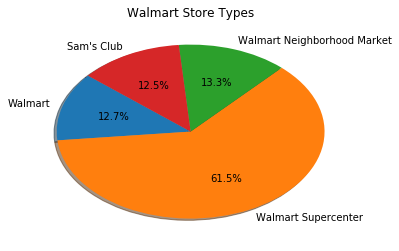

In [9]:
##BREAKDOWN OF WALMART STORE TYPES

store_names = ["Walmart", "Walmart Supercenter", "Walmart Neighborhood Market", "Sam's Club"]
store_counts = [walmart_count, walmart_supercenter_count, neighborhood_market_count, sams_club_count]
plt.pie(store_counts, labels=store_names, shadow=True, autopct='%1.1f%%', startangle=140)
plt.title('Walmart Store Types')

plt.savefig("Photos/types_of_stores.png", bbox_inches="tight")
plt.show()

In [10]:
#exploration below

In [11]:
#break incomes down by the https://www.thebalance.com/definition-of-middle-class-income-4126870
lower_lowIncome = zip_incomes.loc[zip_incomes['Household Income'] < 24999]
upper_lowIncome = zip_incomes.loc[(zip_incomes['Household Income'] > 24999) & (zip_incomes['Household Income'] < 34999)]
lower_midIncome = zip_incomes.loc[(zip_incomes['Household Income'] > 35000) & (zip_incomes['Household Income'] < 49999)]
middle_midIncome = zip_incomes.loc[(zip_incomes['Household Income'] > 50000) & (zip_incomes['Household Income'] < 74999)]
upper_midIncome = zip_incomes.loc[(zip_incomes['Household Income'] > 75000) & (zip_incomes['Household Income'] < 99999)]
lower_highIncome = zip_incomes.loc[(zip_incomes['Household Income'] > 100000) & (zip_incomes['Household Income'] < 199999)]
middle_highIncome = zip_incomes.loc[(zip_incomes['Household Income'] > 100000) & (zip_incomes['Household Income'] < 149999)]
upper_highIncome = zip_incomes.loc[zip_incomes['Household Income'] > 150000]

In [12]:
upper_midIncome_count = upper_midIncome['Zipcode'].count()
middle_midIncome_count = middle_midIncome['Zipcode'].count()
lower_midIncome_count = lower_midIncome['Zipcode'].count()

Text(0.5,1,'Total Walmarts By Middle Income Households')

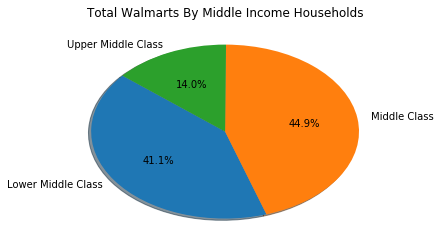

In [13]:
middlelabels = ["Lower Middle Class", "Middle Class", "Upper Middle Class"]
middle_incomes = [lower_midIncome_count, middle_midIncome_count, upper_midIncome_count]
plt.pie(middle_incomes, labels=middlelabels, shadow=True, autopct='%1.1f%%', startangle=140)
plt.title('Total Walmarts By Middle Income Households')

In [14]:
#stores by type.
#Includes all income levels
walmart = zip_incomes.loc[zip_incomes['Store Type'] == "Walmart"]
walmart_count = walmart['Store Type'].count()
walmart_supercenter = zip_incomes.loc[zip_incomes['Store Type'] == "Walmart Supercenter"]
walmart_supercenter_count = walmart_supercenter['Store Type'].count()
sams_club = zip_incomes.loc[zip_incomes['Store Type'] == "Sam's Club"]
sams_club_count = sams_club['Store Type'].count()
neighborhood_market = zip_incomes.loc[zip_incomes['Store Type'] == "Walmart Neighborhood Market"]
neighborhood_market_count = neighborhood_market['Store Type'].count()

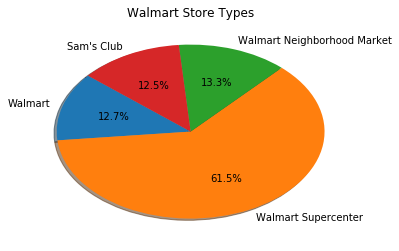

In [15]:
##BREAKDOWN OF WALMART STORE TYPES

store_names = ["Walmart", "Walmart Supercenter", "Walmart Neighborhood Market", "Sam's Club"]
store_counts = [walmart_count, walmart_supercenter_count, neighborhood_market_count, sams_club_count]
plt.pie(store_counts, labels=store_names, shadow=True, autopct='%1.1f%%', startangle=140)
plt.title('Walmart Store Types')

plt.savefig("Photos/types_of_stores.png", bbox_inches="tight")
plt.show()

In [16]:
#lower_midIncome
lm_walmart = lower_midIncome.loc[lower_midIncome['Store Type'] == "Walmart"]
lm_walmart_supercenter = lower_midIncome.loc[lower_midIncome['Store Type'] == "Walmart Supercenter"]
lm_sams_club = lower_midIncome.loc[lower_midIncome['Store Type'] == "Sam's Club"]
lm_neighborhood_market = lower_midIncome.loc[lower_midIncome['Store Type'] == "Walmart Neighborhood Market"]
lm_walmart_count = lm_walmart['Zipcode'].count()
lm_walmart_supercenter_count = lm_walmart_supercenter['Zipcode'].count()
lm_sams_club_count = lm_sams_club['Zipcode'].count()
lm_neighborhood_market_count = lm_neighborhood_market['Zipcode'].count()

Text(0.5,1,'Walmart Store Types in Lower Middle Class')

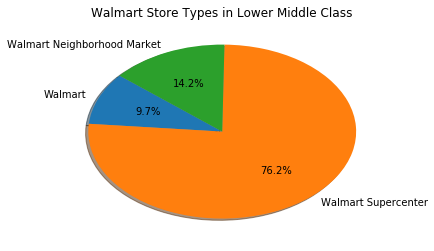

In [17]:
lm_store_names = ["Walmart", "Walmart Supercenter", "Walmart Neighborhood Market"]
lm_store_counts = [lm_walmart_count, lm_walmart_supercenter_count, lm_neighborhood_market_count]
plt.pie(lm_store_counts, labels=lm_store_names, shadow=True, autopct='%1.1f%%', startangle=140)
plt.title('Walmart Store Types in Lower Middle Class')

In [18]:
#lowIncome
lower_walmart = lowIncome.loc[lowIncome['Store Type'] == "Walmart"]
lower_walmart_count = lower_walmart['Store Type'].count()
lower_walmart_supercenter = lowIncome.loc[lowIncome['Store Type'] == "Walmart Supercenter"]
lower_walmart_supercenter_count = lower_walmart_supercenter['Store Type'].count()
lower_neighborhood_market = lowIncome.loc[lowIncome['Store Type'] == "Walmart Neighborhood Market"]
lower_neighborhood_market_count = lower_neighborhood_market['Store Type'].count()

Text(0.5,1,'Walmart Store Types in Lower Class')

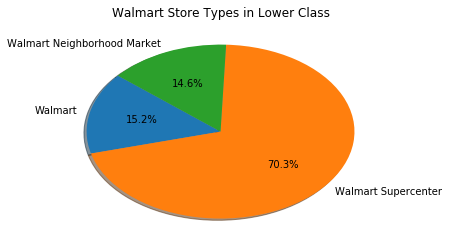

In [19]:
lower_store_names = ["Walmart", "Walmart Supercenter", "Walmart Neighborhood Market"]
lower_store_counts = [lower_walmart_count, lower_walmart_supercenter_count, lower_neighborhood_market_count]
plt.pie(lower_store_counts, labels=lower_store_names, shadow=True, autopct='%1.1f%%', startangle=140)
plt.title('Walmart Store Types in Lower Class')

In [20]:
#highIncome
high_walmart = upper_midIncome.loc[upper_midIncome['Store Type'] == "Walmart"]
high_walmart_count = high_walmart['Store Type'].count()
high_walmart_supercenter = upper_midIncome.loc[upper_midIncome['Store Type'] == "Walmart Supercenter"]
high_walmart_supercenter_count = high_walmart_supercenter['Store Type'].count()
high_neighborhood_market = upper_midIncome.loc[upper_midIncome['Store Type'] == "Walmart Neighborhood Market"]
high_neighborhood_market_count = high_neighborhood_market['Store Type'].count()

Text(0.5,1,'Walmart Store Types in Upper Class')

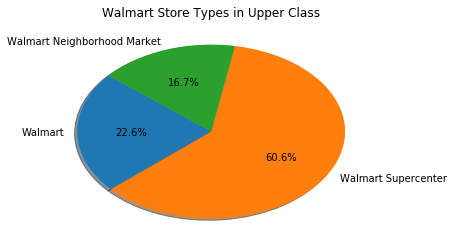

In [21]:
high_store_names = ["Walmart", "Walmart Supercenter", "Walmart Neighborhood Market"]
high_store_counts = [high_walmart_count, high_walmart_supercenter_count, high_neighborhood_market_count]
plt.pie(high_store_counts, labels=high_store_names, shadow=True, autopct='%1.1f%%', startangle=140)
plt.title('Walmart Store Types in Upper Class')

In [22]:
#income levels from low to high
poverty_levels = zip_incomes.loc[zip_incomes['Household Income'] < 24999]
low_income = zip_incomes.loc[(zip_incomes['Household Income'] > 24999) & (zip_incomes['Household Income'] < 34999)]
middle_class1 = zip_incomes.loc[(zip_incomes['Household Income'] > 35000) & (zip_incomes['Household Income'] < 49999)]
median = zip_incomes.loc[(zip_incomes['Household Income'] > 50000) & (zip_incomes['Household Income'] < 74999)]
middle_class2 = zip_incomes.loc[(zip_incomes['Household Income'] > 75000) & (zip_incomes['Household Income'] < 99999)]
upper_middle = zip_incomes.loc[(zip_incomes['Household Income'] > 100000) & (zip_incomes['Household Income'] < 199999)]
high_income = zip_incomes.loc[(zip_incomes['Household Income'] > 100000) & (zip_incomes['Household Income'] < 149999)]
highest_income = zip_incomes.loc[zip_incomes['Household Income'] > 150000]

In [23]:
#store counts by income levels from low to high
poverty_levels_count = poverty_levels['Store Type'].count()
low_income_count = low_income['Store Type'].count()
middle_class1_count = middle_class1['Store Type'].count()
median_count = median['Store Type'].count()
middle_class2_count = middle_class2['Store Type'].count()
upper_middle_count = upper_middle['Store Type'].count()
high_income_count = high_income['Store Type'].count()
highest_income_count = highest_income['Store Type'].count()

In [24]:
#walmart counts for each income level

walmart_poverty_levels = poverty_levels.loc[poverty_levels['Store Type'] == "Walmart"]
walmart_poverty_levels_count = walmart_poverty_levels['Store Type'].count()

walmart_low_income = low_income.loc[low_income['Store Type'] == "Walmart"]
walmart_low_income_count = walmart_low_income['Store Type'].count()

walmart_middle_class1 = middle_class1.loc[middle_class1['Store Type'] == "Walmart"]
walmart_middle_class1_count = walmart_middle_class1['Store Type'].count()

walmart_median = median.loc[median['Store Type'] == "Walmart"]
walmart_median_count = walmart_median['Store Type'].count()

walmart_middle_class2 = middle_class2.loc[middle_class2['Store Type'] == "Walmart"]
walmart_middle_class2_count = walmart_middle_class2['Store Type'].count()

walmart_upper_middle = upper_middle.loc[upper_middle['Store Type'] == "Walmart"]
walmart_upper_middle_count = walmart_upper_middle['Store Type'].count()

walmart_high_income = high_income.loc[high_income['Store Type'] == "Walmart"]
walmart_high_income_count = walmart_high_income['Store Type'].count()

walmart_highest_income = highest_income.loc[highest_income['Store Type'] == "Walmart"]
walmart_highest_income_count = walmart_highest_income['Store Type'].count()



In [25]:
#Walmart Supercenter counts for each income level

walmartsupercenter_poverty_levels = poverty_levels.loc[poverty_levels['Store Type'] == "Walmart Supercenter"]
walmartsupercenter_poverty_levels_count = walmartsupercenter_poverty_levels['Store Type'].count()

walmartsupercenter_low_income = low_income.loc[low_income['Store Type'] == "Walmart Supercenter"]
walmartsupercenter_low_income_count = walmartsupercenter_low_income['Store Type'].count()

walmartsupercenter_middle_class1 = middle_class1.loc[middle_class1['Store Type'] == "Walmart Supercenter"]
walmartsupercenter_middle_class1_count = walmartsupercenter_middle_class1['Store Type'].count()

walmartsupercenter_median = median.loc[median['Store Type'] == "Walmart Supercenter"]
walmartsupercenter_median_count = walmartsupercenter_median['Store Type'].count()

walmartsupercenter_middle_class2 = middle_class2.loc[middle_class2['Store Type'] == "Walmart Supercenter"]
walmartsupercenter_middle_class2_count = walmartsupercenter_middle_class2['Store Type'].count()

walmartsupercenter_upper_middle = upper_middle.loc[upper_middle['Store Type'] == "Walmart Supercenter"]
walmartsupercenter_upper_middle_count = walmartsupercenter_upper_middle['Store Type'].count()

walmartsupercenter_high_income = high_income.loc[high_income['Store Type'] == "Walmart Supercenter"]
walmartsupercenter_high_income_count = walmartsupercenter_high_income['Store Type'].count()

walmartsupercenter_highest_income = highest_income.loc[highest_income['Store Type'] == "Walmart Supercenter"]
walmartsupercenter_highest_income_count = walmartsupercenter_highest_income['Store Type'].count()



In [26]:
#walmart markets counts for each income level

walmartmarket_poverty_levels = poverty_levels.loc[poverty_levels['Store Type'] == "Walmart Neighborhood Market"]
walmartmarket_poverty_levels_count = walmartmarket_poverty_levels['Store Type'].count()

walmartmarket_low_income = low_income.loc[low_income['Store Type'] == "Walmart Neighborhood Market"]
walmartmarket_low_income_count = walmartmarket_low_income['Store Type'].count()

walmartmarket_middle_class1 = middle_class1.loc[middle_class1['Store Type'] == "Walmart Neighborhood Market"]
walmartmarket_middle_class1_count = walmartmarket_middle_class1['Store Type'].count()

walmartmarket_median = median.loc[median['Store Type'] == "Walmart Neighborhood Market"]
walmartmarket_median_count = walmartmarket_median['Store Type'].count()

walmartmarket_middle_class2 = middle_class2.loc[middle_class2['Store Type'] == "Walmart Neighborhood Market"]
walmartmarket_middle_class2_count = walmartmarket_middle_class2['Store Type'].count()

walmartmarket_upper_middle = upper_middle.loc[upper_middle['Store Type'] == "Walmart Neighborhood Market"]
walmartmarket_upper_middle_count = walmartmarket_upper_middle['Store Type'].count()

walmartmarket_high_income = high_income.loc[high_income['Store Type'] == "Walmart Neighborhood Market"]
walmartmarket_high_income_count = walmartmarket_high_income['Store Type'].count()

walmartmarket_highest_income = highest_income.loc[highest_income['Store Type'] == "Walmart Neighborhood Market"]
walmartmarket_highest_income_count = walmartmarket_highest_income['Store Type'].count()



In [27]:
#Sam's Club counts for each income level

sam_poverty_levels = poverty_levels.loc[poverty_levels['Store Type'] == "Sam's Club"]
sam_poverty_levels_count = sam_poverty_levels['Store Type'].count()

sam_low_income = low_income.loc[low_income['Store Type'] == "Sam's Club"]
sam_low_income_count = sam_low_income['Store Type'].count()

sam_middle_class1 = middle_class1.loc[middle_class1['Store Type'] == "Sam's Club"]
sam_middle_class1_count = sam_middle_class1['Store Type'].count()

sam_median = median.loc[median['Store Type'] == "Sam's Club"]
sam_median_count = sam_median['Store Type'].count()

sam_middle_class2 = middle_class2.loc[middle_class2['Store Type'] == "Sam's Club"]
sam_middle_class2_count = sam_middle_class2['Store Type'].count()

sam_upper_middle = upper_middle.loc[upper_middle['Store Type'] == "Sam's Club"]
sam_upper_middle_count = sam_upper_middle['Store Type'].count()

sam_high_income = high_income.loc[high_income['Store Type'] == "Sam's Club"]
sam_high_income_count = sam_high_income['Store Type'].count()

sam_highest_income = highest_income.loc[highest_income['Store Type'] == "Sam's Club"]
sam_highest_income_count = sam_highest_income['Store Type'].count()


Text(0.5,1,'Walmarts by Income Class')

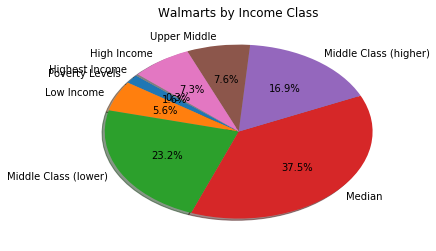

In [28]:
#Walmarts in different income levels
walmart_by_income_labels = ["Poverty Levels", "Low Income", "Middle Class (lower)", "Median", "Middle Class (higher)", "Upper Middle", "High Income", "Highest Income"]

walmart_by_income = [walmart_poverty_levels_count, walmart_low_income_count, walmart_middle_class1_count, walmart_median_count, walmart_middle_class2_count, walmart_upper_middle_count, walmart_high_income_count, walmart_highest_income_count]

plt.pie(walmart_by_income, labels=walmart_by_income_labels, shadow=True, autopct='%1.1f%%', startangle=140)
plt.title('Walmarts by Income Class')

Text(0.5,1,'Walmart Supercenters by Income Class')

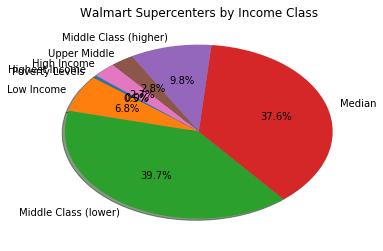

In [29]:
#Walmart Supercenters in different income levels
walmartsupercenters_by_income_labels = ["Poverty Levels", "Low Income", "Middle Class (lower)", "Median", "Middle Class (higher)", "Upper Middle", "High Income", "Highest Income"]

walmartsupercenters_by_income = [walmartsupercenter_poverty_levels_count, walmartsupercenter_low_income_count, walmartsupercenter_middle_class1_count, walmartsupercenter_median_count, walmartsupercenter_middle_class2_count, walmartsupercenter_upper_middle_count, walmartsupercenter_high_income_count, walmartsupercenter_highest_income_count]

plt.pie(walmartsupercenters_by_income, labels=walmartsupercenters_by_income_labels, shadow=True, autopct='%1.1f%%', startangle=140)

plt.title('Walmart Supercenters by Income Class')

Text(0.5,1,'Walmart Neighborhood Markets by Income Class')

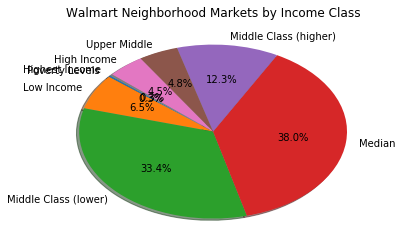

In [30]:
#Walmart Markets in different income levels
walmartmarkets_by_income_labels = ["Poverty Levels", "Low Income", "Middle Class (lower)", "Median", "Middle Class (higher)", "Upper Middle", "High Income", "Highest Income"]

walmartmarkets_by_income = [walmartmarket_poverty_levels_count, walmartmarket_low_income_count, walmartmarket_middle_class1_count, walmartmarket_median_count, walmartmarket_middle_class2_count, walmartmarket_upper_middle_count, walmartmarket_high_income_count, walmartmarket_highest_income_count]

plt.pie(walmartmarkets_by_income, labels=walmartmarkets_by_income_labels, shadow=True, autopct='%1.1f%%', startangle=140)

plt.title('Walmart Neighborhood Markets by Income Class')

Text(0.5,1,"Sam's Club by Income Class")

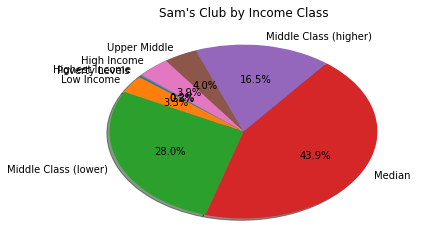

In [31]:
#Sam's Club in different income levels
sams_by_income_labels = ["Poverty Levels", "Low Income", "Middle Class (lower)", "Median", "Middle Class (higher)", "Upper Middle", "High Income", "Highest Income"]

sams_by_income = [sam_poverty_levels_count, sam_low_income_count, sam_middle_class1_count, sam_median_count, sam_middle_class2_count, sam_upper_middle_count, sam_high_income_count, sam_highest_income_count]

plt.pie(sams_by_income, labels=sams_by_income_labels, shadow=True, autopct='%1.1f%%', startangle=140)

plt.title("Sam's Club by Income Class")

Text(0,0.5,"Number of Sam's Clubs")

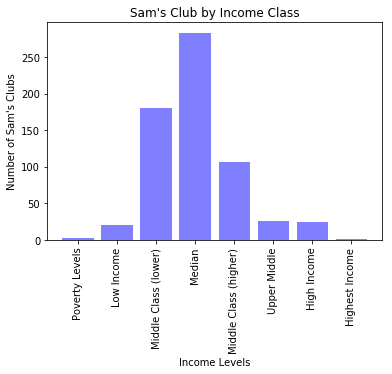

In [32]:


sams_by_income_labels = ["Poverty Levels", "Low Income", "Middle Class (lower)", "Median", "Middle Class (higher)", "Upper Middle", "High Income", "Highest Income"]

sams_by_income = [sam_poverty_levels_count, sam_low_income_count, sam_middle_class1_count, sam_median_count, sam_middle_class2_count, sam_upper_middle_count, sam_high_income_count, sam_highest_income_count]


plt.bar(sams_by_income_labels, sams_by_income, color='blue', alpha=0.5, align="center")
plt.xticks(rotation='vertical')


plt.title("Sam's Club by Income Class")
plt.xlabel("Income Levels")
plt.ylabel("Number of Sam's Clubs")

Text(0,0.5,'Number of Walmart Neighborhood Markets')

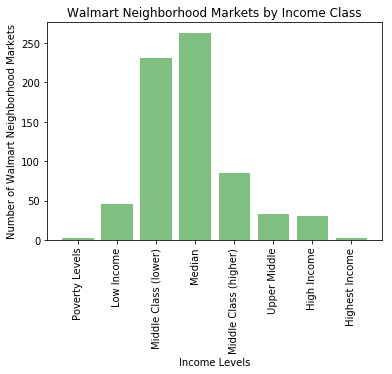

In [33]:
#Walmart Markets in different income levels
walmartmarkets_by_income_labels = ["Poverty Levels", "Low Income", "Middle Class (lower)", "Median", "Middle Class (higher)", "Upper Middle", "High Income", "Highest Income"]

walmartmarkets_by_income = [walmartmarket_poverty_levels_count, walmartmarket_low_income_count, walmartmarket_middle_class1_count, walmartmarket_median_count, walmartmarket_middle_class2_count, walmartmarket_upper_middle_count, walmartmarket_high_income_count, walmartmarket_highest_income_count]

plt.bar(walmartmarkets_by_income_labels, walmartmarkets_by_income, color='g', alpha=0.5, align="center")
plt.xticks(rotation='vertical')

plt.title("Walmart Neighborhood Markets by Income Class")
plt.xlabel("Income Levels")
plt.ylabel("Number of Walmart Neighborhood Markets")

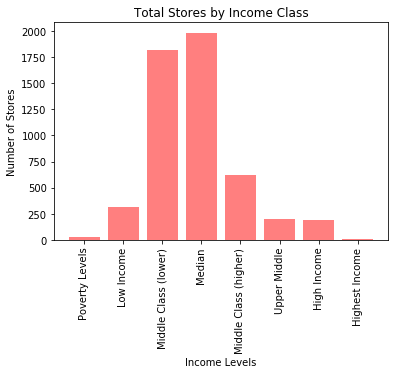

In [34]:
##BREAKDOWN OF STORE COUNTS BY INCOME LEVLES

stores_by_income_labels = ["Poverty Levels", "Low Income", "Middle Class (lower)", "Median", "Middle Class (higher)", "Upper Middle", "High Income", "Highest Income"]

stores_by_income_counts = [poverty_levels_count, low_income_count, middle_class1_count, median_count, middle_class2_count, upper_middle_count, high_income_count, highest_income_count]



plt.bar(stores_by_income_labels, stores_by_income_counts, color='r', alpha=0.5, align="center")
plt.xticks(rotation='vertical')


plt.title("Total Stores by Income Class")
plt.xlabel("Income Levels")
plt.ylabel("Number of Stores")


#plt.tight_layout()
plt.savefig("Photos/total_stores_by_income_class.png", bbox_inches="tight")


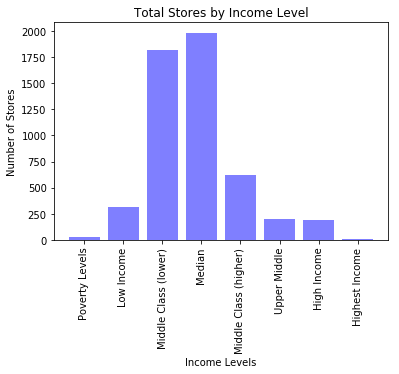

In [35]:
##BREAKDOWN OF STORE COUNTS BY INCOME LEVLES

stores_by_income_labels = ["Poverty Levels", "Low Income", "Middle Class (lower)", "Median", "Middle Class (higher)", "Upper Middle", "High Income", "Highest Income"]

stores_by_income_counts = [poverty_levels_count, low_income_count, middle_class1_count, median_count, middle_class2_count, upper_middle_count, high_income_count, highest_income_count]



plt.bar(stores_by_income_labels, stores_by_income_counts, color='b', alpha=0.5, align="center")
plt.xticks(rotation='vertical')


plt.title("Total Stores by Income Level")
plt.xlabel("Income Levels")
plt.ylabel("Number of Stores")


#plt.tight_layout()
plt.savefig("Photos/total_stores_by_income_level.png", bbox_inches="tight")


#Take the total number of stores and determine how many locations are within each income level.

In [36]:
#low to high popultions

lowest_pop = zip_incomes.loc[zip_incomes['Population'] <= 17169]
low_pop = zip_incomes.loc[(zip_incomes['Population'] >= 17170) & (zip_incomes['Population'] <= 28344)]
high_pop = zip_incomes.loc[(zip_incomes['Population'] >= 28345) & (zip_incomes['Population'] <= 40936)]
highest_pop = zip_incomes.loc[zip_incomes['Population'] >= 40937]

In [37]:
lowest_pop_count = lowest_pop['Store Type'].count()
low_pop_count = low_pop['Store Type'].count()
high_pop_count = high_pop['Store Type'].count()
highest_pop_count = highest_pop['Store Type'].count()

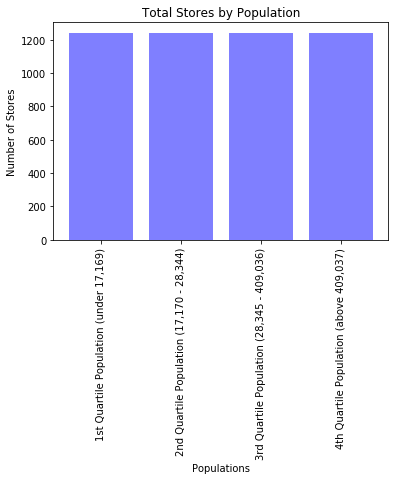

In [38]:
population_labels = ["1st Quartile Population (under 17,169)", "2nd Quartile Population (17,170 - 28,344)", "3rd Quartile Population (28,345 - 409,036)", "4th Quartile Population (above 409,037)"]

population_counts = [lowest_pop_count, low_pop_count, high_pop_count, highest_pop_count]


plt.bar(population_labels, population_counts, color='b', alpha=0.5, align="center")
plt.xticks(rotation='vertical')

plt.title("Total Stores by Population")
plt.xlabel("Populations")
plt.ylabel("Number of Stores")



#plt.savefig("Photos/stores_by_population.png")
plt.show()

In [39]:
#ages of people young to old

lowest_age = zip_incomes.loc[zip_incomes['Median Age'] <= 34.7]
lowest_age_count = lowest_age['Store Type'].count()

low_age = zip_incomes.loc[(zip_incomes['Median Age'] >= 34.8) & (zip_incomes['Median Age'] <= 37.9)]
low_age_count = low_age['Store Type'].count()

high_age = zip_incomes.loc[(zip_incomes['Median Age'] >= 38) & (zip_incomes['Median Age'] <= 41.4)]
high_age_count = high_age['Store Type'].count()

highest_age = zip_incomes.loc[zip_incomes['Median Age'] >= 41.5]
highest_age_count = highest_age['Store Type'].count()


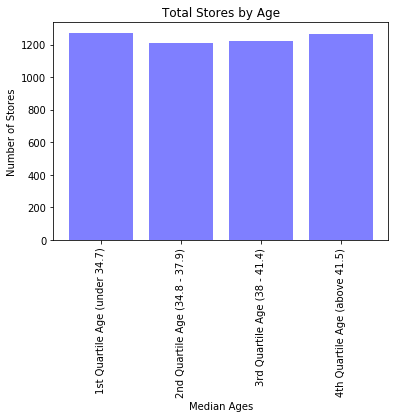

In [40]:
age_labels = ["1st Quartile Age (under 34.7)", "2nd Quartile Age (34.8 - 37.9)", "3rd Quartile Age (38 - 41.4)", "4th Quartile Age (above 41.5)"]

age_counts = [lowest_age_count, low_age_count, high_age_count, highest_age_count]


plt.bar(age_labels, age_counts, color='b', alpha=0.5, align="center")
plt.xticks(rotation='vertical')

plt.title("Total Stores by Age")
plt.xlabel("Median Ages")
plt.ylabel("Number of Stores")



plt.show()